# Previsão de Notas Escolares Com Análise de Regressão
*06 de abril, 2022*
___

![](https://media.istockphoto.com/vectors/students-vector-id1179973797?k=20&m=1179973797&s=170667a&w=0&h=eF46x41GmCZOkpBlNZHZMxkq42o5SaskvdhnjCLyuSY=)

___

O desempenho de um estudante na universidade é influenciado por vários fatores, muitos deles são externos e independentes da atitude do aluno, mas outros estão inteiramente associados a dedicação do aluno.
Além disso, Há também fatores que dependem da sociedade como um todo. Em vista disso, esta análise busca evidenciar alguns dos fatores que mais influenciam o sucesso acadêmico dos alunos.

**Objetivo:** entender a relação entre as notas finais dos alunos e as diversas características de suas vidas pessoal e acadêmica, podendo assim, fazer previsões sobre o desempenho dos alunos nas provas finais. Para esta análise será criado um modelo que deve ter no mínimo 75% de acurácia.

___

### Tecnologias Utilizadas:

* Linguagem R versão 4.1.2 - 64 bits
* Linguagem Markdown
* Jupyter Notebook

___

### Etapa 1 - Preparação do ambiente e carregamento dos dados.

Conjunto de dados obtidos do [UCI - Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

Caso não tenha os pacotes abaixo instalados, será necessário instalar todos os pacotes que aparecem como comentários.

In [1]:
# install.packages("ggplot2")
# install.packages("ggthemes")
# install.packages("dplyr")
# install.packages("corrplot")
# install.packages("corrgram")
# install.packages("miscset")
# install.packages("caTools")
# install.packages("e1071")
# install.packages("miscTools")
options(warn=-1)

Importando todos os pacotes que serão utilizados durante a análise.

In [2]:
library(miscset)
library(ggplot2)
library(ggthemes)
library(dplyr)
library(corrplot)
library(corrgram)
library(reshape2)
library(caTools)
library(e1071)
library(miscTools)
library(repr)



Attaching package: 'dplyr'

The following object is masked from 'package:miscset':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.92 loaded


Carregando o conjunto de dados com os dados dos estudantes.

In [3]:
df <- read.csv2('estudantes.csv', stringsAsFactors = FALSE)

___
### Etapa 2 - Análise exploratória dos dados

Visualização de parte do conjunto de dados

In [4]:
head(df)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


Verificando os tipos das variáveis no conjunto de dados

In [5]:
str(df)

'data.frame':	395 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "yes" "yes" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $

Verificando se há valores ausentes na base de dados

In [6]:
any(is.na(df))

[1] FALSE

Verificando se há registros duplicados no conjunto de dados

In [47]:
table(duplicated(df))


FALSE 
  395 

Analisando acorrelação entre as variáveis numéricas

In [7]:
colunas_numericas <- sapply(df, is.numeric)
data_cor <- cor(df[, colunas_numericas])
head(data_cor)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000000,-0.16365842,-0.163438069,0.07064072,-0.004140037,0.24366538,0.053940096,0.01643439,0.12696388,0.131124605,0.11727605,-0.062187369,0.17523008,-0.06408150,-0.1434740,-0.16157944
Medu,-0.163658419,1.00000000,0.623455112,-0.17163930,0.064944137,-0.23667996,-0.003914458,0.03089087,0.06409444,0.019834099,-0.04712346,-0.046877829,0.10028482,0.20534100,0.2155272,0.21714750
Fedu,-0.163438069,0.62345511,1.000000000,-0.15819405,-0.009174639,-0.25040844,-0.001369727,-0.01284553,0.04310467,0.002386429,-0.01263102,0.014741537,0.02447289,0.19026994,0.1648934,0.15245694
traveltime,0.070640721,-0.17163930,-0.158194054,1.00000000,-0.100909119,0.09223875,-0.016807986,-0.01702494,0.02853967,0.138325309,0.13411575,0.007500606,-0.01294378,-0.09303999,-0.1531980,-0.11714205
studytime,-0.004140037,0.06494414,-0.009174639,-0.10090912,1.000000000,-0.17356303,0.039730704,-0.14319841,-0.06390368,-0.196019263,-0.25378473,-0.075615863,-0.06270018,0.16061192,0.1358800,0.09781969
failures,0.243665377,-0.23667996,-0.250408444,0.09223875,-0.173563031,1.00000000,-0.044336626,0.09198747,0.12456092,0.136046931,0.14196203,0.065827282,0.06372583,-0.35471761,-0.3558956,-0.36041494


Criando o corrplot (mapa de correlação) para analisar a correlação entre as variáveis de maneira ggráfica

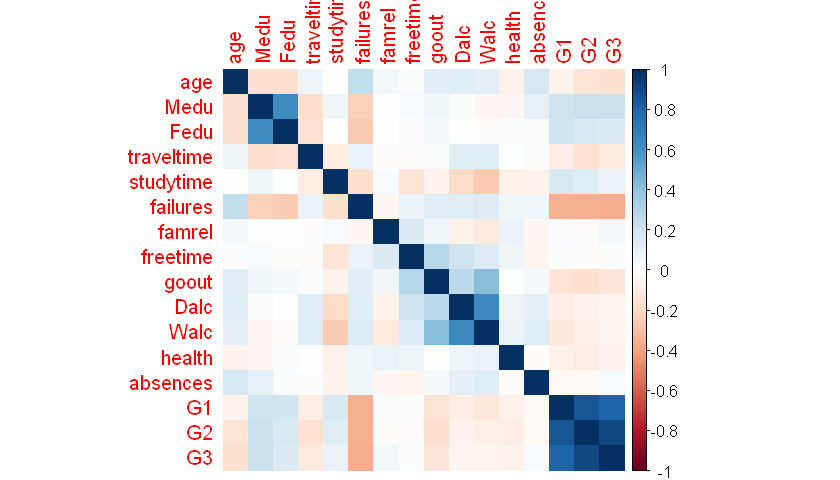

In [8]:
options(repr.plot.width=7, repr.plot.height=4)
corrplot(data_cor, method = 'color')

 Analisando o gráfico a cima podemos notar que há uma forte corrrelação entre as variáveis G1 e G2 com a variável que queremos prever, G3. Sendo assim, vamos analisar um pouco mais as distribuições de frequências das variáveis G1, G2 e G3

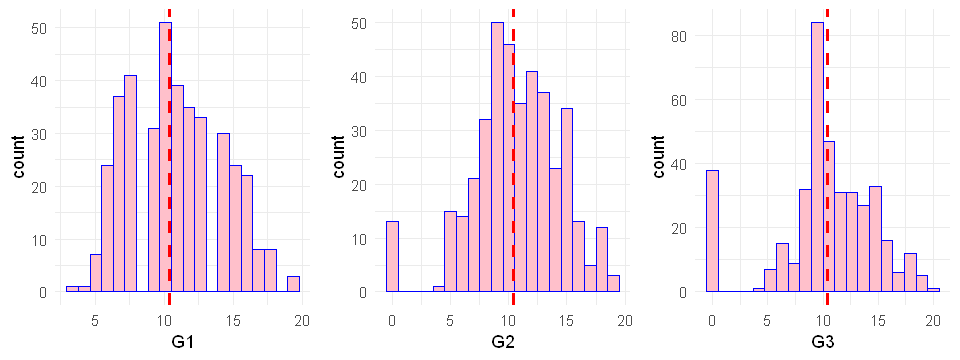

In [9]:
options(repr.plot.width=8, repr.plot.height=3)
ggplotGrid(ncol = 3,
           lapply(c("G1", "G2", "G3"),
                  function(col) {
                    ggplot(df, aes_string(col)) + 
                      geom_histogram(color="blue", fill="pink", bins = 20) +
                      geom_vline(aes(xintercept=mean(G3)),
                                 color="red", linetype="dashed", size=1) +
                      theme_minimal()
                  }))

Podemos notar a cima que as variáveis G1 e G2 e G3 possuem distribuições semelelhantes, tendo médias próximas de 10.
No entanto, podemos ver em G2 e G3 um deslocamento das frequências no sentido esquerdo, ou seja, frequências diferentes nos extremos.

Para estes casos analisaremos abaixo as estatísticas descritivas com o uso de um gráfico de boxplot.

In [10]:
# Criando uma tabela apenas com as variáveis G1, G2 e G3

df_boxplot <- tibble(G1 = df$G1, G2 = df$G2, G3 = df$G3)

# Reorganizando os dados para analisarmos as 3 variáveis em apenas um plot

df_boxplot <- melt(data = df_boxplot,
                   value.name = "exam_score",
                   variable.name= "exam")

No id variables; using all as measure variables


Plotagem do gráfico boxplot

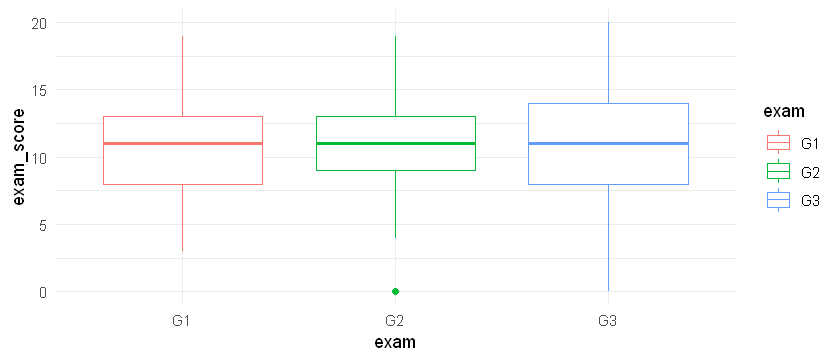

In [11]:
options(repr.plot.width=7, repr.plot.height=3)
ggplot(df_boxplot, aes(x=exam, y=exam_score, color=exam)) +
  geom_boxplot() + theme_minimal()

Podemos notar algumas características dessas variáveis:
* Existem outliers (pontos de mínimo) em G2;
* O intervalo interquartil é maior para G3 que para G1 e G2;
* As medianas estão próximas da média, o que pode indicar normalidade dos dados.
___

Apenas a proximidade entre medianas e médias não são o suficiente para indicar se os dados se assemelham ou não a uma distribuição normal.
Para isto é recomendável a aplicação de algum teste de normalidade. Neste caso, usaremos o teste de normalidade de **Shapiro-Wilk**.

Como resultado, o teste retornará a estatística W, que terá um valor de significância associada, e o valor-p. Para dizer que uma distribuição é normal, o valor p *precisa ser maior do que* **0,05**.

Agora, vamos aplicar o teste de normalidade de Shapiro-Wilk para as variáveis G1, G2 e G3 considerando as hipóteses:

* **H0**: Os dados são normalmente distribuídos.
* **H1**: Os dados não são normalmente distribuídos.

In [12]:
shapiro.test(df$G1)


	Shapiro-Wilk normality test

data:  df$G1
W = 0.97491, p-value = 2.454e-06


In [13]:
shapiro.test(df$G2)


	Shapiro-Wilk normality test

data:  df$G2
W = 0.96914, p-value = 2.084e-07


In [14]:
shapiro.test(df$G3)


	Shapiro-Wilk normality test

data:  df$G3
W = 0.92873, p-value = 8.836e-13


___
Todos os valores de p-valor acima foram menores que o nível de significância. Sendo assim, **rejeitamos a hipótese nula (H0)** para as três variáveis. Isto quer dizer que há forte evidência de que os dados não são normalmente distribuídos, pois diferem de uma curva normal.

Verificaremos agora, as variaveis categóricas do conjunto de dados, ou seja, as variáveis qualitativas.

Obtendo as variáveis categóricas do dataset

In [15]:
colunas_categoricas <- sapply(df, is.character)
colunas_categoricas <- colnames(df[, colunas_categoricas])

Analisando as distribuições de frequências das variáveis categóricas

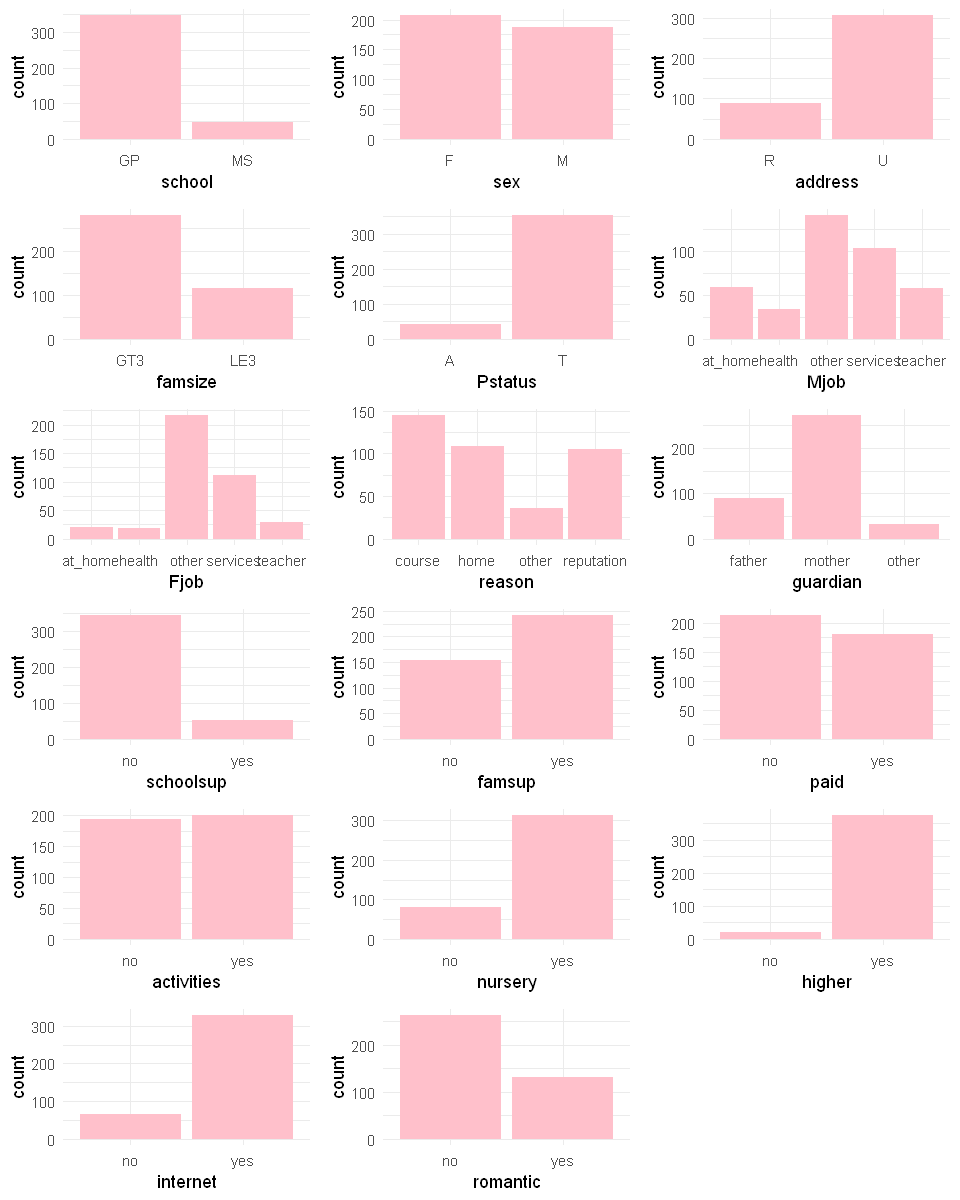

In [16]:
options(repr.plot.width=8, repr.plot.height=10)
ggplotGrid(ncol = 3,
           lapply(colunas_categoricas,
                  function(col) {
                    ggplot(df, aes_string(col)) + geom_bar(fill="pink") + theme_minimal()
                  }))

___
### Etapa 3 - Pré-processamento dos Dados

Vamos criar uma função para aplicar a normalização dos dados, uma vez que possuímos variáveis em diferentes escalas. Neste caso, queremos evitar que o modelo sofra um efeito muito forte dos coeficientes das variáveis de maior escala.

In [17]:
normalizar <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

Normalizando os dados

In [18]:
dados_norm <- as.data.frame(lapply(df[, colunas_numericas], normalizar))
head(dados_norm)

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0.4285714,1.00,1.00,0.3333333,0.3333333,0,0.75,0.50,0.75,0.00,0.00,0.5,0.08000000,0.1250,0.3157895,0.30
0.2857143,0.25,0.25,0.0000000,0.3333333,0,1.00,0.50,0.50,0.00,0.00,0.5,0.05333333,0.1250,0.2631579,0.30
0.0000000,0.25,0.25,0.0000000,0.3333333,1,0.75,0.50,0.25,0.25,0.50,0.5,0.13333333,0.2500,0.4210526,0.50
0.0000000,1.00,0.50,0.0000000,0.6666667,0,0.50,0.25,0.25,0.00,0.00,1.0,0.02666667,0.7500,0.7368421,0.75
0.1428571,0.75,0.75,0.0000000,0.3333333,0,0.75,0.50,0.25,0.00,0.25,1.0,0.05333333,0.1875,0.5263158,0.50
0.1428571,1.00,0.75,0.0000000,0.3333333,0,1.00,0.75,0.25,0.00,0.25,1.0,0.13333333,0.7500,0.7894737,0.75


Unindo novamente o dataframe (vars categóricas + numéricas)

In [20]:
dados_norm <- cbind(dados_norm, df[, colunas_categoricas])
head(dados_norm)

age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0.4285714,1.00,1.00,0.3333333,0.3333333,0,0.75,0.50,0.75,0.00,...,course,mother,yes,no,no,no,yes,yes,no,no
0.2857143,0.25,0.25,0.0000000,0.3333333,0,1.00,0.50,0.50,0.00,...,course,father,no,yes,no,no,no,yes,yes,no
0.0000000,0.25,0.25,0.0000000,0.3333333,1,0.75,0.50,0.25,0.25,...,other,mother,yes,no,yes,no,yes,yes,yes,no
0.0000000,1.00,0.50,0.0000000,0.6666667,0,0.50,0.25,0.25,0.00,...,home,mother,no,yes,yes,yes,yes,yes,yes,yes
0.1428571,0.75,0.75,0.0000000,0.3333333,0,0.75,0.50,0.25,0.00,...,home,father,no,yes,yes,no,yes,yes,no,no
0.1428571,1.00,0.75,0.0000000,0.3333333,0,1.00,0.75,0.25,0.00,...,reputation,mother,no,yes,yes,yes,yes,yes,yes,no


___
### Etapa 4 - Construção do Modelo de Regressão

Agora iremos dividir o dataset em dados de treino e teste de forma aleatória. Destinaremos 70% dos dados para treino e 30% para teste.

In [21]:
amostra <- sample.split(df$age, 0.70)
treino <- subset(df, amostra == TRUE)
teste <- subset(df, amostra == FALSE)

Treinando os modelos com os dados sem pré-processamento.
* modelo_v1: Incluindo todas as variáveis preditoras.
* modelo_v2: Incluindo apenas as variáveis preditoras G1 e G2 que apresentaram uma forte correlação positiva.

In [22]:
modelo_v1 <- lm(G3 ~ ., treino)       
modelo_v2 <- lm(G3 ~ G2 + G1, treino) 

Verificando o R2 dos modelos, ou seja o quanto o modelo criado é capaz de explicar os dados.

In [23]:
paste("R2 do modelo_v1:", round(summary(modelo_v1)[["r.squared"]]*100, 2), "%")
paste("R2 do modelo_v2:", round(summary(modelo_v2)[["r.squared"]]*100, 2), "%")

[1] "R2 do modelo_v1: 84.59 %"

[1] "R2 do modelo_v2: 82.12 %"

Faremos o mesmo com os dados normalizados para verificar se houve melhora na acurácia do modelo.

In [24]:
amostra <- sample.split(dados_norm$age, 0.70)
treino_norm <- subset(dados_norm, amostra == TRUE)
teste_norm <- subset(dados_norm, amostra == FALSE)

Construindo novos modelos com os dados que foram **pré-processados** (normalizados)

In [26]:
modelo_v3 <- lm(G3 ~ ., treino_norm)
modelo_v4 <- lm(G3 ~ G2 + G1, treino_norm)

Treinando os modelos com os dados normalizados durante o pré-processamento.
* modelo_v3: Incluindo todas as variáveis preditoras.
* modelo_v4: Incluindo apenas as variáveis preditoras G1 e G2 que apresentaram uma forte correlação positiva.

In [27]:
paste("R2 do modelo_v3:", round(summary(modelo_v3)[["r.squared"]]*100, 2), "%")
paste("R2 do modelo_v4:", round(summary(modelo_v4)[["r.squared"]]*100, 2), "%")

[1] "R2 do modelo_v3: 86.5 %"

[1] "R2 do modelo_v4: 84.25 %"

___
Construindo o modelo de regressão com o Suport Vector Machine (SVM)

In [44]:
modelo_v5 <- svm(G3 ~ ., treino, type = 'eps-regression', kernel='radial')
summary(modelo_v5)


Call:
svm(formula = G3 ~ ., data = treino, type = "eps-regression", kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02380952 
    epsilon:  0.1 


Number of Support Vectors:  185






Fazendo previsões e calculando o **R2** para o modelo_v5 (SVM)

In [48]:
resultados_1 <- predict(modelo_v5, teste[-33])

rsq = rSquared(teste[["G3"]], resid = teste[["G3"]] - resultados_1)
rsq

0.7808573


In [49]:
# Obtendo os resíduos do modelo_v1

res <- residuals(modelo_v1)
res <- as.data.frame(res)
head(res)

,res
2,1.83149375
4,1.32118060
6,-1.06984272
7,-0.59685972
8,1.40756133
9,0.01993313


Podemos notar que o modelo que apresentou maior acurácia foi o modelo_v3, apresentando um R2 de **86.5 %**. Portanto, selecionaremos este modelo como a versão final.

Testando os modelo_v3

In [82]:
prevendo_G3 <- predict(modelo_v3, teste_norm[, -16])

# Visualizando valores previstos e observados

resultados <- cbind(prevendo_G3, teste_norm$G3)
colnames(resultados) <- c("Previsto", "Real")
resultados <- as.data.frame(resultados)
head(resultados)

,Previsto,Real
3,0.3698672,0.50
6,0.8062246,0.75
7,0.6044354,0.55
8,0.2342742,0.30
11,0.4021824,0.45
14,0.5472028,0.55


Verificando se há valores de notas negativos

In [83]:
resultados[resultados$Previsto < 0 ,]

,Previsto,Real
136,-0.03349234,0


Encontramos um valor negativo nesta previsão. Aplicaremos uma função para tratar valores negativos em nossa previsão

In [85]:
resultados$Previsto <- sapply(resultados$Previsto, function(x){ifelse(x < 0, 0, x)})
head(resultados)

,Previsto,Real
3,0.3698672,0.50
6,0.8062246,0.75
7,0.6044354,0.55
8,0.2342742,0.30
11,0.4021824,0.45
14,0.5472028,0.55


Agora, calcularemos o erro médio (MSE), ou seja, o quão distantes os valores previstos pelo modelo estão dos valores observados.

In [91]:
mse <- mean((resultados$Real - resultados$Previsto)^2)
print(mse)

[1] 0.01299436


Calculando o quadrado do erro médio (RMSE)

In [92]:
rmse <- mse^0.5
print(rmse)

[1] 0.1139928


Calculando o R Squared

In [100]:
SSE = sum((resultados$Previsto - resultados$Real)^2)
SST = sum((mean(dados_norm$G3) - resultados$Real)^2)
R2 = 1 - (SSE/SST)
R2

[1] 0.7751641

Temos um modelo que explica **77,52%** dos dados